In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing, svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
file_path='../DSD Datasets/USA_Housing.csv'
df=pd.read_csv(file_path)

In [4]:
#Make a new Dataset considering only ‘Avg. Area House Age’ and ‘Price’ attributes

df_binary = df[['Avg. Area House Age', 'Price']].copy()
df_binary_columns = ['Avg. Area House Age', 'Price']
df_binary.head()

,Avg. Area House Age,Price
0,5.682861,1.059034e+06
1,6.002900,1.505891e+06
2,5.865890,1.058988e+06
3,7.188236,1.260617e+06
4,5.040555,6.309435e+05


In [6]:
#Set a variable ‘x’ equal to the ‘Avg. Area House Age’ feature of the given dataset and a variable ‘y’ equal to the ‘Price’ column

x = df['Avg. Area House Age']
y = df['Price']

In [8]:
x

0       5.682861
1       6.002900
2       5.865890
3       7.188236
4       5.040555
          ...   
4995    7.830362
4996    6.999135
4997    7.250591
4998    5.534388
4999    5.992305
Name: Avg. Area House Age, Length: 5000, dtype: float64

In [9]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [10]:
#Split the new dataset into the Training set and Test set such that Test set contains 1/3 of total records using model_selection.train_test_split from sklearn.

X = np.array(df_binary['Avg. Area House Age']).reshape(-1,1)
Y = np.array(df_binary['Price']).reshape(-1,1)
#df_binary.dropna(inplace=True)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)

In [11]:
#Train the Simple Linear Regression model based on the Training set after importing LinearRegression from sklearn.linear_model.

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [12]:
#Display the model’s coefficients after train the model and hence write the final regression model.

print(lr.score(x_test,y_test))
lr.coef_
lr.intercept_

m=lr.intercept_
b=lr.coef_
print('y=',m,'*X+',b)

0.18317407669297026
y= [228430.04707604] *X+ [[167546.38499551]]


In [13]:
#Predict the house price of the Test set data and display them

pred = lr.predict(x_test)
print(pred)

[[1102456.97307968]
 [ 855681.32464072]
 [1233207.19745522]
 ...
 [1288298.62759992]
 [1381644.16255912]
 [1097054.59554761]]


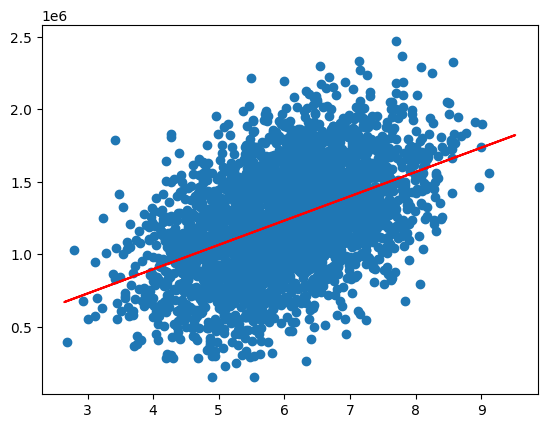

In [14]:
#Visualize the Training set results using scatter plot along with regression line.

plt.scatter(x_train,y_train)
plt.plot(x_test,pred,color='red')

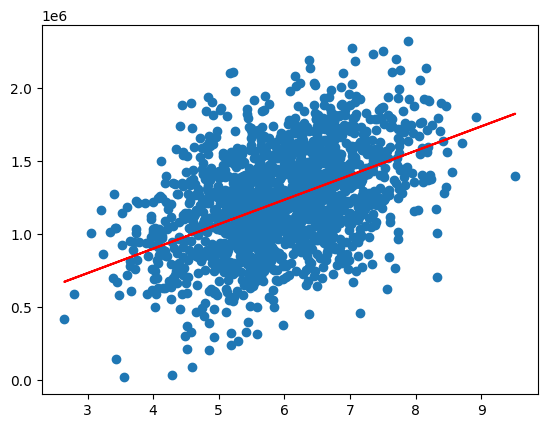

In [15]:
#Visualize the Test set results using scatter plot along with regression line

plt.scatter(x_test,y_test)
plt.plot(x_test,pred,color='red')